In [578]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('dark_background') 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from keras.layers import Dropout

In [579]:
data = pd.read_csv('SA_Aqar.csv')
data

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,الخبر,حي اللؤلؤ,غرب,437,0,7,5,2,1,1,...,1,0,1,0,1,1,0,1,60000,للإيجار فيلا دورين وملحق في حي الأصداف\n\nالمس...
3714,الخبر,حي الصواري,جنوب,400,0,5,5,3,0,1,...,1,0,1,0,1,1,0,0,55000,دبلكس للأيجار حي الصواري ج ٤٣\n\nمجلس خارجي (د...
3715,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...
3716,الخبر,حي الكورنيش,جنوب,300,13,6,5,2,1,1,...,0,0,1,0,1,1,0,0,90000,فيلا فاخرة في حي كورنيش الخبر. أفضل حي بالخبر....


In [580]:
print(data.shape)
print(data.info())

(3718, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 


In [581]:
data.drop(['details'], axis=1, inplace=True)

In [582]:
data.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [583]:
corr = data.corr()
corr.price.sort_values(ascending=False)

price           1.000000
driver_room     0.297801
basement        0.258388
ac              0.246500
pool            0.243424
maid_room       0.188361
livingrooms     0.163844
furnished       0.157764
property_age    0.156226
elevator        0.089036
frontyard       0.087986
kitchen         0.086546
stairs          0.084582
garage          0.075580
size            0.055199
bathrooms       0.039583
roof            0.001057
fireplace      -0.040993
bedrooms       -0.055860
duplex         -0.117014
Name: price, dtype: float64

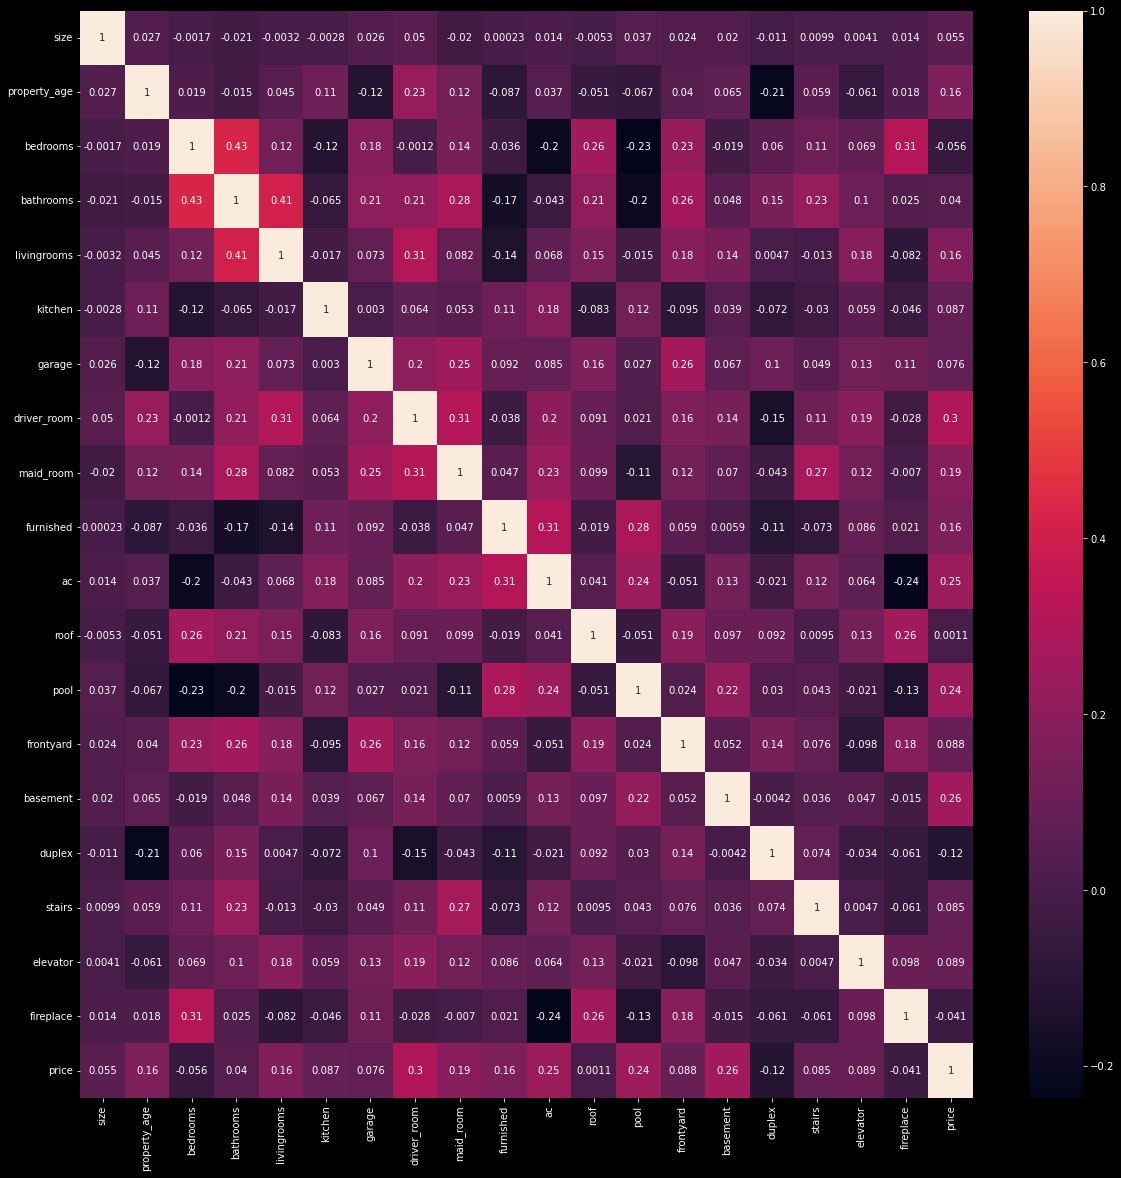

In [584]:
corr = data.iloc[:, 3:].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

<AxesSubplot:xlabel='price', ylabel='size'>

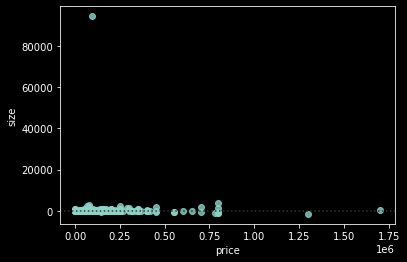

In [585]:
sns.residplot(x='price', y='size', data=data)

<Figure size 864x864 with 0 Axes>

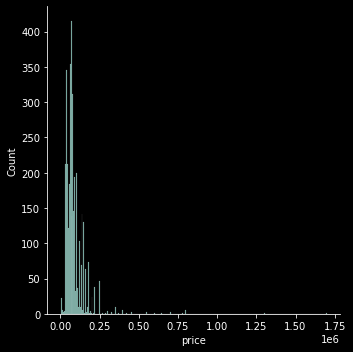

In [586]:
plt.figure(figsize=(12,12))
sns.displot(data['price'])

In [587]:
data = data[data['price'] < 280000]
data = data[data['size'] < 1200]

<AxesSubplot:xlabel='price', ylabel='size'>

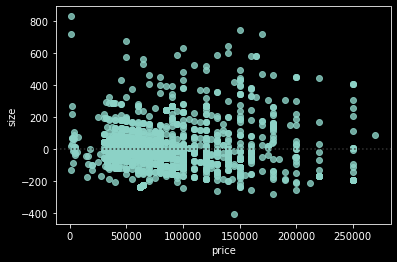

In [588]:
sns.residplot(x='price', y='size', data=data)

In [589]:
# Encoding city, district and front

data = pd.get_dummies(data, columns=['city', 'district', 'front'], drop_first=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 3717
Columns: 203 entries, size to front_غرب
dtypes: int64(20), uint8(183)
memory usage: 1.2 MB


In [590]:
X = data.drop(['price'], axis=1)
Y = data['price']


In [591]:
X

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,district_ حي منفوحة الجديدة,front_4 شوارع,front_جنوب,front_جنوب شرقي,front_جنوب غربي,front_شرق,front_شمال,front_شمال شرقي,front_شمال غربي,front_غرب
0,250,0,5,5,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,370,0,4,5,2,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,380,0,4,5,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,250,0,5,5,3,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,400,11,7,5,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,437,0,7,5,2,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3714,400,0,5,5,3,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3715,330,0,6,4,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3716,300,13,6,5,2,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [592]:
# Splitting the data into train, test and validation

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =0)



In [593]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [594]:
model = Sequential([
    Dropout(0.2, input_shape=(202,)),
    Dense(30, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1),
])

In [595]:
model.compile(optimizer='Adam',
              loss='mse'
              )

In [596]:
hist =  model.fit(X_train, Y_train.values,
              validation_data=(X_test,Y_test.values),
              batch_size=265,
              epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 8ms/step - loss: 8743044096.0000 - val_loss: 8822905856.0000
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 8742882304.0000 - val_loss: 8822712320.0000
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 8742639616.0000 - val_loss: 8822386688.0000
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 8742209536.0000 - val_loss: 8821814272.0000
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 8741463040.0000 - val_loss: 8820817920.0000
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 8740173824.0000 - val_loss: 8819112960.0000
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 8737944576.0000 - val_loss: 8816294912.0000
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 8734372864.0000 - val_loss: 8811725824.0000
Epoch 9/500
12/12 [==============================] - 0s 2ms/step

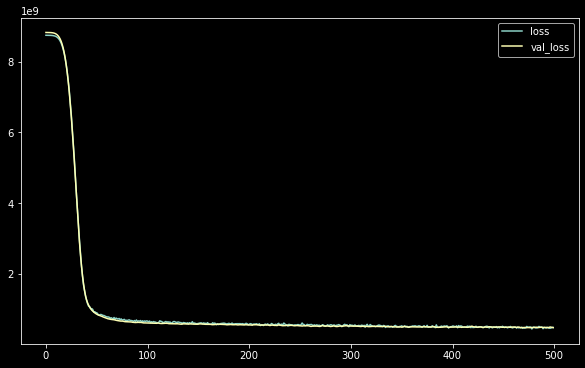

In [597]:
plt.figure(figsize=(10, 6))

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [598]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(Y_test,y_pred))

0.7736003318134368


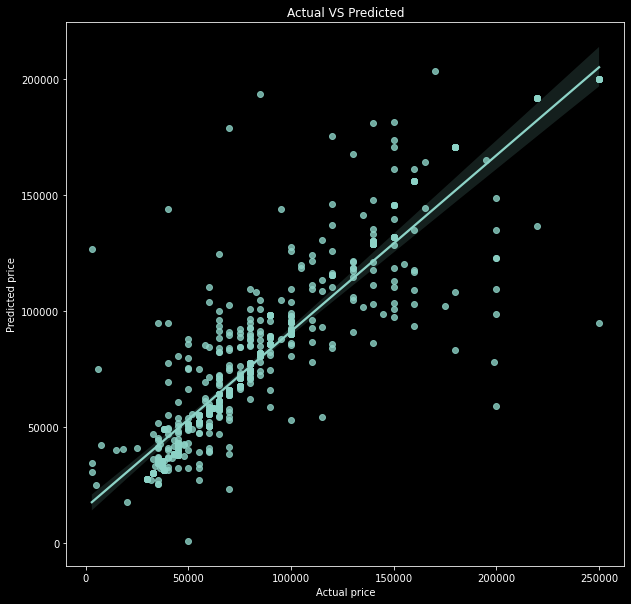

In [599]:
fig, ax = plt.subplots(figsize=(10, 10))



sns.regplot(x=Y_test, y = y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual VS Predicted")
plt.show()